# Classificação

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#X_train, X_test, Y_train, Y_test = train_test_split( df, target_aux, test_size=0.20, random_state=11)
import pickle
with open('variaveis.pkl', 'rb') as f:
  X_train, Y_train, X_test, Y_test = pickle.load(f)
#le = LabelEncoder()
#Y_train = le.fit_transform(Y_train)


In [13]:
X_test.to_excel("results.xlsx") 
X_test.head()

,Q20__nota_português_2.ºperiodo,Q26__nota_mat_2.ºperiodo,Q16_satisfação_com_notas_escolares,Q15_as_minhas_notas,envolvimento_scoretotal
782,5.0,5.0,5.0,3.0,21.0
46,4.0,3.0,3.0,2.0,18.0
732,3.0,4.0,4.0,3.0,18.0
259,4.0,5.0,3.0,4.0,23.0
589,4.0,4.0,5.0,3.0,21.0


## XGBoost

In [14]:
error_rate = []

for i in tqdm(range(1,50)):
    xgb = XGBClassifier(max_depth=i)
    xgb.fit( X_train, Y_train)
    predictions = xgb.predict(X_test)
    error_rate.append(np.mean(predictions != Y_test))

100%|██████████| 49/49 [00:05<00:00,  9.18it/s]


Text(0, 0.5, 'Error Rate')

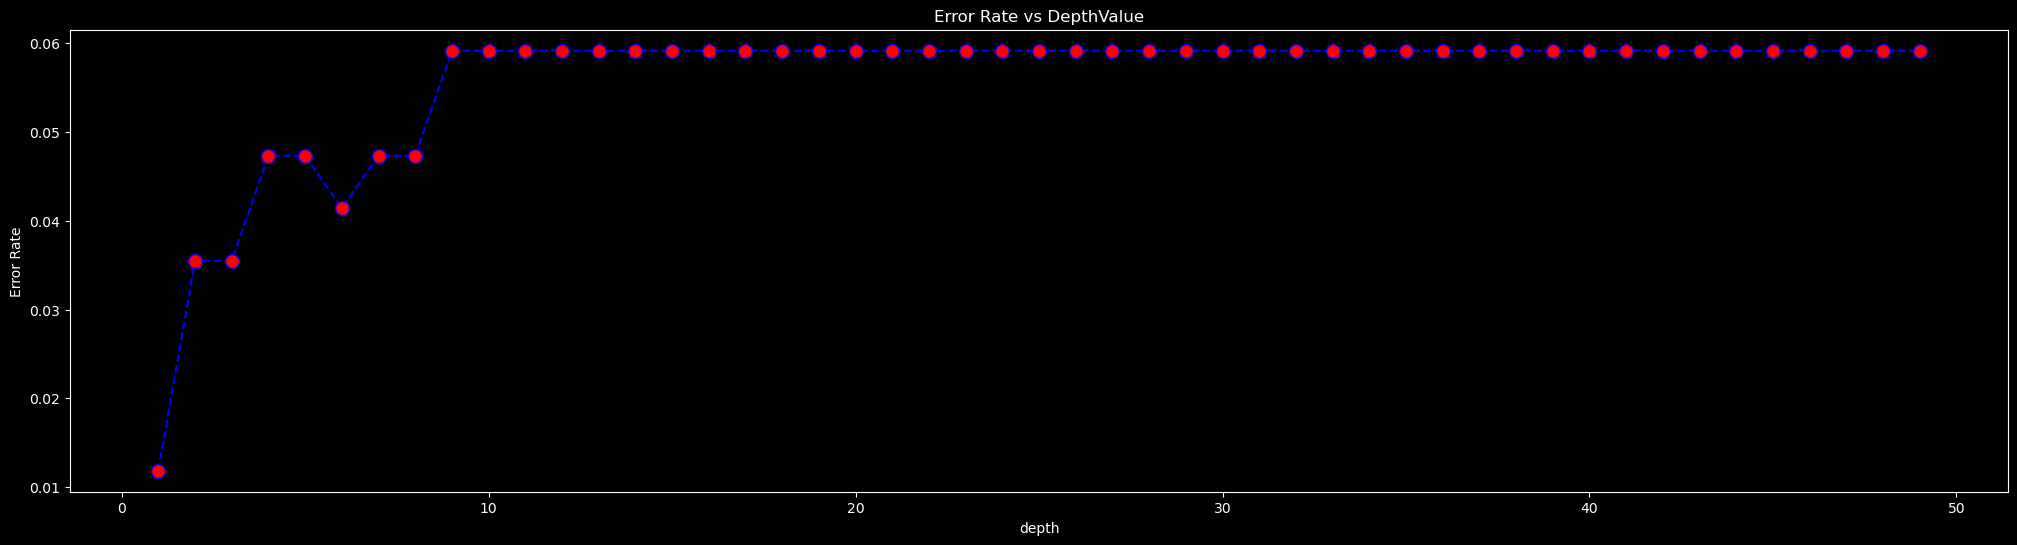

In [15]:
plt.figure(figsize=(25,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

In [16]:
# Create the parameter grid based on the results of random search 
parameters = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [1,2,3,4,5,6,7,8]
        }

# Create the model
#xgboost_model = XGBClassifier(use_label_encoder=False,metric='multiclass', eval_metric='mlogloss',silent=True)
xgboost_model = XGBClassifier(use_label_encoder=False,objective='multi:softmax',num_classes = 4,silent=True)

# Best model
opt_model_xgb = GridSearchCV(xgboost_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_xgb.fit(X_train, Y_train)

print (opt_model_xgb.best_estimator_)

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\a

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:24:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 1/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.971 total time=   0.0s
[CV 2/5; 1/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:24:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 1/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 3/5; 1/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:24:55] WARNING: C:\Users\dev-admin\croot2\xgboost-s

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 2/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 2/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:24:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 2/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 2/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:24:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 2/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 2/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 3/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 3/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:24:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 3/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 3/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:24:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 3/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 3/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 3/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 4/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:24:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 4/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 4/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:24:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 4/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 4/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 4/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 4/192] START colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:24:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 4/192] END colsample_bytree=0.6, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.933 total time=   0.0s
[CV 1/5; 5/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:24:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 5/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 5/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 5/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 3/5; 5/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:24:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 5/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 5/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:24:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 5/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 5/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 5/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 6/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:24:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 6/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 6/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:24:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 6/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 6/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 6/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 6/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:24:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 6/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 7/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:24:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 7/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 7/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 7/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 7/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:24:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 7/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 7/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:24:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 7/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 7/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 7/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.933 total time=   0.0s
[CV 1/5; 8/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 8/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 8/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 8/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 8/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 8/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 8/192] START colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 8/192] END colsample_bytree=0.6, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 9/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 9/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 9/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 9/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 3/5; 9/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 9/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 9/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 9/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 9/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 9/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 10/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:24:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 10/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 10/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 10/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 10/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:24:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 10/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 10/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:24:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 10/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 10/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 10/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 11/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:24:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 11/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 11/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:24:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 11/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 11/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 11/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 11/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:24:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 11/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 11/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:24:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 11/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 12/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 12/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 12/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:24:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 12/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 12/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:24:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 12/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 12/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 12/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 12/192] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 12/192] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.970 total time=   0.0s
[CV 1/5; 13/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 13/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 13/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 13/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 13/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 13/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 13/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 13/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 13/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 13/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 14/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 14/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s


c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 14/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 14/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 14/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 14/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 14/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: {

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 15/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 15/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 15/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 15/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 15/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 15/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 15/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.970 total time=   0.0s
[CV 1/5; 16/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 16/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 16/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 16/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 16/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 16/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 16/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 16/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 16/192] START colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 16/192] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 17/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 17/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 17/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 17/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 3/5; 17/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 17/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 17/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 17/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 17/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 17/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 18/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 18/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.1s
[CV 2/5; 18/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 18/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 18/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 18/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 18/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 18/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 5/5; 18/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 18/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 19/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 19/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 19/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 19/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 19/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 19/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 19/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 19/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 19/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 19/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 20/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 20/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 20/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 20/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 20/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 20/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.1s
[CV 4/5; 20/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 20/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 20/192] START colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 20/192] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 21/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 21/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 21/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 21/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 21/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 21/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.1s
[CV 4/5; 21/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 21/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 21/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 21/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 22/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 22/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.1s
[CV 2/5; 22/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 22/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 22/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 22/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 22/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 22/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 22/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 22/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.1s
[CV 1/5; 23/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 23/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 23/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 23/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 23/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 23/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 23/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 23/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 23/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 23/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 24/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 24/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 24/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 24/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 24/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 24/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 24/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 24/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 24/192] START colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 24/192] END colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 25/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 25/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.971 total time=   0.0s
[CV 2/5; 25/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 25/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 25/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 25/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 25/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 25/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 25/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 25/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 26/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 26/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 26/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 26/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 26/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 26/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 26/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 26/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 26/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 26/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 27/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 27/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 27/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 27/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 27/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 27/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 27/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 27/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 27/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 27/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 28/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 28/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 28/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 28/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 28/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 28/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 28/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 28/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 28/192] START colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 28/192] END colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 29/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 29/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.971 total time=   0.0s
[CV 2/5; 29/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:25:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 29/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 3/5; 29/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 29/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 29/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 29/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 29/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 29/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 30/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 30/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 30/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 30/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 30/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 30/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 30/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 30/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 30/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 30/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 31/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 31/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 31/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 31/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 31/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 31/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 31/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 31/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 31/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 31/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 32/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 32/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 32/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 32/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 32/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 32/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 32/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 32/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 32/192] START colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 32/192] END colsample_bytree=0.6, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 33/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 33/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 33/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 33/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 33/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, sub

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 33/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 33/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 33/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 34/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 34/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 34/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 34/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 34/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 34/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 34/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 34/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 35/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 35/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 35/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 35/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 35/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 35/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 35/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 36/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 36/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 36/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 36/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 36/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 36/192] START colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 36/192] END colsample_bytree=0.6, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 37/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 37/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 37/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 37/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 37/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 37/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 37/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 37/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 37/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 37/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 38/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 38/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 38/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 38/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 38/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 38/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 38/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 38/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 39/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 39/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.926 total time=   0.0s
[CV 2/5; 39/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 39/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 39/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 39/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 39/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 39/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 39/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 39/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.933 total time=   0.0s
[CV 1/5; 40/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 40/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 40/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 40/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 3/5; 40/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 40/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 40/192] START colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 40/192] END colsample_bytree=0.6, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 41/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 41/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 41/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 41/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 41/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 41/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 41/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 41/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 41/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 41/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 42/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 42/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 42/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 42/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 42/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 42/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 42/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 42/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 42/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 42/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 43/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 43/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 43/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 43/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 43/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 43/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 43/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 43/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 43/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 43/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 44/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 44/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 44/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 44/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 44/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 44/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 44/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 44/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 44/192] START colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 44/192] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.978 total time=   0.0s
[CV 1/5; 45/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 45/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 45/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 45/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 45/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 45/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 45/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 45/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 45/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 45/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 46/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 46/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 46/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 46/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 46/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 46/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 46/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 46/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 46/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 46/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 47/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 47/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 47/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 47/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 47/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 47/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 47/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 47/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 47/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 47/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 48/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 48/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 48/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 48/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 48/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 48/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 48/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 48/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 48/192] START colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 48/192] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 49/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 49/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 49/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 49/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 49/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 49/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 49/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 49/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 49/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 49/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 50/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 50/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 50/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 50/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 50/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 50/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 50/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 50/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 50/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 50/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 51/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 51/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 51/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 51/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 51/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 51/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 51/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 51/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 51/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 51/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 52/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 52/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 52/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 52/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 52/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 52/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 52/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 52/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 52/192] START colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 52/192] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 53/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 53/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 53/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 53/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 53/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 53/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 53/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 53/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 53/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 53/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 54/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 54/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 54/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 54/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 54/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 54/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 54/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 54/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 54/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 54/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 55/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 55/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 55/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 55/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 55/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 55/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 55/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 55/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 55/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 55/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 56/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 56/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 56/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 56/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 56/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 56/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 56/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 56/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 56/192] START colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 56/192] END colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 57/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 57/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 57/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 57/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 57/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 57/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 57/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 57/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 57/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 57/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 58/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 58/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 58/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 58/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 58/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 58/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 58/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 58/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 58/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 58/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 1/5; 59/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 59/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 59/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 59/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 59/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 59/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 59/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 59/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.1s
[CV 5/5; 59/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 59/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 60/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 60/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 60/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 60/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 60/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 60/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 60/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 60/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 60/192] START colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 60/192] END colsample_bytree=0.6, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.933 total time=   0.0s
[CV 1/5; 61/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 61/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 61/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 61/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 61/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 61/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.1s
[CV 4/5; 61/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 61/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.1s
[CV 5/5; 61/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 61/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 62/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 62/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 62/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 62/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 62/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 62/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.1s
[CV 4/5; 62/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 62/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 62/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 62/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 1/5; 63/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 63/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 63/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 63/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 63/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 63/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 63/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 63/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 63/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 63/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 64/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 64/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 64/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 64/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 64/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 64/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 64/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsa

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 64/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 64/192] START colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 64/192] END colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.933 total time=   0.0s
[CV 1/5; 65/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 65/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 65/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 65/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 65/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 65/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 65/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 65/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 65/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 66/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 66/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 66/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.933 total time=   0.0s
[CV 3/5; 66/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 66/192] END colsample_bytree=0.6, gamma=1.5, max_dep

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 66/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 66/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 66/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.978 total time=   0.0s
[CV 1/5; 67/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 67/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 67/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 67/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 67/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 67/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 67/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 67/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: {

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 68/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 68/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 68/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.933 total time=   0.0s
[CV 3/5; 68/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 68/192] END colsample_bytree=0.6, gamma=1.5, max_dep

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 68/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 68/192] START colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 68/192] END colsample_bytree=0.6, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 69/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 69/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 69/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 69/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 69/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 69/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 69/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 69/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 69/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 69/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 70/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 70/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.926 total time=   0.0s
[CV 2/5; 70/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 70/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 70/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 70/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 70/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 70/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 70/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 70/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 71/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 71/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 71/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 71/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 71/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 71/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 5/5; 71/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 71/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.933 total time=   0.0s
[CV 1/5; 72/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 72/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 72/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 72/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 3/5; 72/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 72/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 72/192] START colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 72/192] END colsample_bytree=0.6, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 73/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 73/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 73/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 73/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 73/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 73/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 73/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 73/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 73/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 73/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 74/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 74/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 74/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 74/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 74/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 74/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 74/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 74/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 74/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 74/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 75/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 75/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 75/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 75/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 75/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 75/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 75/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 75/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 75/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 75/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 76/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 76/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 76/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 76/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 3/5; 76/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 76/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 76/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 76/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 76/192] START colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 76/192] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.978 total time=   0.0s
[CV 1/5; 77/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 77/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 77/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 77/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 77/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 77/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 77/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 77/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 77/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 77/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s


c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 78/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 78/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 78/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 78/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 78/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: {

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 78/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 78/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 78/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 78/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 78/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 79/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 79/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 79/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 79/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 79/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 79/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 79/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 79/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 79/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 79/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 80/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 80/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 80/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 80/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 3/5; 80/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 80/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 80/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 80/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 80/192] START colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 80/192] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 81/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 81/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 81/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 81/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 81/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 81/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 81/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 81/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.970 total time=   0.0s
[CV 5/5; 81/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 81/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 82/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 82/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 82/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 82/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 82/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 82/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 82/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 82/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 83/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 83/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 83/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 83/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 83/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 83/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 83/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 83/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 83/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 83/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 84/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 84/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 84/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 84/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 84/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 84/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 84/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 84/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.970 total time=   0.0s
[CV 5/5; 84/192] START colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 84/192] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 85/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 85/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 85/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 85/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 85/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 85/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 85/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 85/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 85/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 85/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 86/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 86/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 86/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 86/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 86/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 86/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 86/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 86/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 86/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 86/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 87/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 87/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 87/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 87/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 87/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 87/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 87/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 87/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 87/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 87/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 88/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 88/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 88/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 88/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 88/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 88/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 88/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 88/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 88/192] START colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 88/192] END colsample_bytree=0.6, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 89/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 89/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 89/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 89/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 89/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 89/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.1s
[CV 4/5; 89/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 89/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 89/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 89/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 90/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:37] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 90/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 90/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:37] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 90/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 90/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:37] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 90/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 90/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:37] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 90/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 90/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:37] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 90/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 1/5; 91/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:37] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 91/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 91/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:37] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 91/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 91/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 91/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 91/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 91/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 91/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 91/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 92/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 92/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 92/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 92/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 92/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 92/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 92/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 92/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 92/192] START colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 92/192] END colsample_bytree=0.6, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 93/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 93/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 93/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 93/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 93/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 93/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 93/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:39] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 93/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 93/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:39] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 93/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 94/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:39] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 94/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 94/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:39] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 94/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 94/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:39] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 94/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 94/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:39] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 94/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.1s
[CV 5/5; 94/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:39] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 94/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.1s
[CV 1/5; 95/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 95/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 95/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 95/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 95/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 95/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 95/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 95/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 95/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 95/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 96/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 96/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 96/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 96/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 96/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 96/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 96/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 96/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 96/192] START colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 96/192] END colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 97/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 97/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.971 total time=   0.0s
[CV 2/5; 97/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 97/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 97/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 97/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 97/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 97/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 98/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 98/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 98/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 98/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 98/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 98/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 98/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 98/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 98/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 99/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 99/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 99/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 99/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 99/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 99/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 99/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 99/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 99/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 100/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 100/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 100/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 100/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 100/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 100/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 100/192] START colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 100/192] END colsample_bytree=0.8, gamma=0.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.933 total time=   0.0s
[CV 1/5; 101/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 101/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 3/5; 101/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 101/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 101/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 101/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 101/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 101/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 102/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 102/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 102/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 102/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 102/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 102/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 102/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 102/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 103/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 103/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 103/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 103/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 103/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 103/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 103/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 103/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 103/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 103/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 104/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 104/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 2/5; 104/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 104/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 104/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 104/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 104/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 104/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 104/192] START colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 104/192] END colsample_bytree=0.8, gamma=0.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 105/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 105/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 2/5; 105/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 105/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 105/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 105/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 105/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 105/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 105/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 105/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 106/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 106/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 106/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 106/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 106/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 106/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 106/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 106/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 106/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 106/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 107/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 107/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 107/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 107/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 107/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 107/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 107/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 107/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 107/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 107/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 108/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 108/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 2/5; 108/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 108/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 108/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 108/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 108/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 108/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 108/192] START colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:25:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 108/192] END colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 109/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 109/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 109/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 109/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 109/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 109/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 109/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 109/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 109/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:25:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 109/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 110/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 110/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 110/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 110/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 110/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 110/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 110/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:25:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 110/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 110/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 110/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 111/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 111/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 111/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 111/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 111/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 111/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 111/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 111/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 111/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:25:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 111/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 112/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 112/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 112/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 112/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 112/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 112/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 112/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 112/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 112/192] START colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:25:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 112/192] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 113/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 113/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 113/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 113/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 113/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 113/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 113/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 113/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 113/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:25:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 113/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.1s
[CV 1/5; 114/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 114/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 114/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 114/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 114/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 114/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 114/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 114/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 114/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:25:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 114/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 115/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 115/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 115/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 115/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 115/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 115/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 115/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 115/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 115/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:25:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 115/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 116/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 116/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 116/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 116/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 116/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 116/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 116/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 116/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 116/192] START colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:25:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 116/192] END colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 117/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 117/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 117/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 117/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 117/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 117/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 117/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 117/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 117/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 117/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 118/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 118/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 118/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 118/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 118/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 118/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 118/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 118/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 118/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 118/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 119/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 119/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 119/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 119/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 119/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 119/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 119/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:51] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 119/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 119/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:25:51] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 119/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 120/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 120/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 120/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:51] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 120/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 120/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:51] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 120/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 120/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 120/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 120/192] START colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:25:51] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 120/192] END colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 121/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:51] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 121/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 121/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 121/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 121/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:51] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 121/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 121/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 121/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 121/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:25:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 121/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 122/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 122/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 122/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 122/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 122/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 122/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 122/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 122/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 122/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:25:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 122/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 123/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 123/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 123/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 123/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 123/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 123/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 123/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 123/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 123/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:25:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 123/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 124/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 124/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 124/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 124/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 124/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 124/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 124/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 124/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 124/192] START colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:25:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 124/192] END colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 125/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 125/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 125/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 125/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 125/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 125/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 125/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 125/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 125/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:25:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 125/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 126/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 126/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 126/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 126/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 126/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 126/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 126/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 126/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 126/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:25:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 126/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 127/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 127/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 127/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 127/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 127/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 127/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 127/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 127/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 127/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:25:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 127/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 128/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 128/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 128/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 128/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 128/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 128/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 128/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 128/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 128/192] START colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:25:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 128/192] END colsample_bytree=0.8, gamma=0.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 129/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 129/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.971 total time=   0.0s
[CV 2/5; 129/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_wei

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 129/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 129/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 129/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 129/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6
[17:25:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 129/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 129/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 129/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 130/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 130/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 130/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 130/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 130/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 130/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 5/5; 130/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0
[17:25:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 130/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 1/5; 131/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 131/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 131/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 131/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 131/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 131/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 131/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6
[17:25:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 131/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 132/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 132/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 132/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 132/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 132/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0
[17:25:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 132/192] END colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 132/192] START colsample_bytree=0.8, gamma=1, max_depth=1, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 133/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 133/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 133/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 133/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 133/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 133/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 133/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 133/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6
[17:25:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 133/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 1/5; 134/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 134/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 134/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 134/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 134/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 134/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 134/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0
[17:25:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 134/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 134/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 135/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 135/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 135/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 135/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 135/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 135/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 135/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 135/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6
[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 135/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 136/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 136/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 136/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 136/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 136/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 136/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 136/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0
[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 136/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.933 total time=   0.0s
[CV 5/5; 136/192] START colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 136/192] END colsample_bytree=0.8, gamma=1, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 137/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 137/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 137/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 137/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 137/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:25:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 137/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 137/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 137/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 137/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6
[17:25:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 137/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 138/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 138/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 138/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 138/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 138/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 138/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 4/5; 138/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 138/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 138/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0
[17:25:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 138/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 139/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 139/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 139/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 139/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 139/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[17:25:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 139/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 139/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 139/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 139/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 139/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 140/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 140/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 140/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 140/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 3/5; 140/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 140/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 140/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 140/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 140/192] START colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 140/192] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.970 total time=   0.0s
[CV 1/5; 141/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 141/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 141/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 141/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 141/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 141/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 141/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 141/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 141/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6
[17:26:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 141/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 142/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[17:26:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 142/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 142/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 142/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 142/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[17:26:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 142/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 142/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0
[17:26:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 142/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 142/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 142/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 143/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[17:26:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 143/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.934 total time=   0.0s
[CV 2/5; 143/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[17:26:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 143/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 143/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 143/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 143/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[17:26:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 143/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 143/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6
[17:26:01] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 143/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 144/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 144/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 144/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 144/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 144/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 144/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 144/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 144/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 144/192] START colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 144/192] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 145/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 145/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 2/5; 145/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 145/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 145/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 145/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 145/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 145/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 145/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 145/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.970 total time=   0.0s
[CV 1/5; 146/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 146/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 146/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 146/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 146/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 146/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 146/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 146/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s


c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 146/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 146/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 147/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 147/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 147/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 147/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 147/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 147/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 147/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 147/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 147/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 147/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 148/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[17:26:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 148/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 148/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[17:26:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 148/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 148/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 148/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 148/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[17:26:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 148/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 148/192] START colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0
[17:26:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 148/192] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 149/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 149/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 149/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6
[17:26:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 149/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 149/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6
[17:26:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 149/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 149/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6
[17:26:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 149/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 149/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6
[17:26:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 149/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 150/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 150/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 150/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 150/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 150/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 150/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 150/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 150/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 150/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 150/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 151/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6
[17:26:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 151/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 151/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6
[17:26:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 151/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 151/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6
[17:26:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 151/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 151/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 151/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 151/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6
[17:26:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 151/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 152/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0
[17:26:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 152/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 152/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 152/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 152/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0
[17:26:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 152/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 152/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0
[17:26:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 152/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 152/192] START colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 152/192] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 153/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 153/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 153/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 153/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 153/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 153/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 153/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 153/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 153/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 153/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.970 total time=   0.0s
[CV 1/5; 154/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 154/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.1s
[CV 2/5; 154/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 154/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 154/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 154/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.1s
[CV 4/5; 154/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 154/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 154/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 154/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.1s
[CV 1/5; 155/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 155/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 155/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 155/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 155/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 155/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 155/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 155/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 155/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 155/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s


c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 156/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0
[17:26:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 156/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 156/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0
[17:26:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 156/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 156/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0
[17:26:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 156/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.1s
[CV 4/5; 156/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0
[17:26:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 156/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 156/192] START colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0
[17:26:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 156/192] END colsample_bytree=0.8, gamma=1, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 157/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 157/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 157/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 157/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 157/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 157/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.1s
[CV 4/5; 157/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 157/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 157/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 157/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.970 total time=   0.1s
[CV 1/5; 158/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 158/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 158/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 158/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.1s
[CV 3/5; 158/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 158/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.970 total time=   0.0s
[CV 4/5; 158/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 158/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 158/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 158/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.1s
[CV 1/5; 159/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6
[17:26:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 159/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 159/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6
[17:26:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 159/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 159/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 159/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 159/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6
[17:26:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 159/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 159/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 159/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 160/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 160/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 160/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 160/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 160/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5,

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 160/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 160/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 160/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 160/192] START colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 160/192] END colsample_bytree=0.8, gamma=1, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 161/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 161/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 2/5; 161/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 161/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 161/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 161/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 161/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 161/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 161/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6
[17:26:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 161/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 162/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 162/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 3/5; 162/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 162/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 162/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 162/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 162/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 163/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 163/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 163/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 3/5; 163/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 163/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 163/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 163/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 163/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=0.6;, score=0.933 total time=   0.0s
[CV 1/5; 164/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 164/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 164/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Paramete

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 164/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 164/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 164/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 5/5; 164/192] START colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0
[17:26:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 164/192] END colsample_bytree=0.8, gamma=1.5, max_depth=1, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 165/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 165/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 165/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 165/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 165/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 165/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.978 total time=   0.0s
[CV 5/5; 165/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 165/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 166/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 166/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 166/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 166/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 166/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 166/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 166/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 166/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 166/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 166/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 167/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 167/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 2/5; 167/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 167/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 167/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 167/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 4/5; 167/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:26:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 167/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 167/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6
[17:26:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 167/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 168/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 168/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.949 total time=   0.0s
[CV 2/5; 168/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:26:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 168/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 3/5; 168/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0
[17:26:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 168/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 168/192] START colsample_bytree=0.8, gamma=1.5, max_depth=2, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 168/192] END colsample_bytree=0.8, gamma=1.5, max_depth=2, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 169/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:26:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 169/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 169/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:26:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 169/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 169/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 169/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 169/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:26:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 169/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 169/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6
[17:26:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 169/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 170/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 170/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 170/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:26:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 170/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 170/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:26:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 170/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 170/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 170/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.963 total time=   0.0s
[CV 5/5; 170/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0
[17:26:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 170/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 171/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:26:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 171/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 171/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 171/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 171/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:26:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 171/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 171/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6
[17:26:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 171/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.963 total time=   0.0s
[CV 5/5; 171/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 171/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 172/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:26:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 172/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 2/5; 172/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:26:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 172/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 3/5; 172/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 172/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 172/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:26:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 172/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.926 total time=   0.0s
[CV 5/5; 172/192] START colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0
[17:26:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 172/192] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.963 total time=   0.0s
[CV 1/5; 173/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 173/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 173/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:26:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 173/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 173/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:26:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 173/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 173/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 173/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 173/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6
[17:26:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 173/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.970 total time=   0.0s
[CV 1/5; 174/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:26:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 174/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 174/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 174/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 174/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:26:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 174/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 174/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0
[17:26:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 174/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 174/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 174/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 175/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:26:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 175/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 175/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:26:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 175/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 175/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 175/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 175/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:26:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 175/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 175/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6
[17:26:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 175/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 1/5; 176/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 176/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 176/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:26:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 176/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 176/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:26:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 176/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 176/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 176/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 176/192] START colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 176/192] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 177/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 177/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 177/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 177/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 177/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 177/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.1s
[CV 4/5; 177/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 177/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 177/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 177/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 178/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 178/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 178/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 178/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 178/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 178/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 178/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 178/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 178/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0
[17:26:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 178/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 179/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:26:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 179/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 179/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 179/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 179/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:26:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 179/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.956 total time=   0.0s
[CV 4/5; 179/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6
[17:26:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 179/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 179/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 179/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 180/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:26:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 180/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 180/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:26:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 180/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 180/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 180/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.948 total time=   0.0s
[CV 4/5; 180/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:26:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 180/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.933 total time=   0.0s
[CV 5/5; 180/192] START colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0
[17:26:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 180/192] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 181/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 181/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 181/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:26:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 181/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 181/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:26:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 181/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 181/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:26:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 181/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 5/5; 181/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6
[17:26:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 181/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.970 total time=   0.0s
[CV 1/5; 182/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 182/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 182/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 182/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 182/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 182/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 182/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 182/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 5/5; 182/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 182/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 183/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 183/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 183/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 183/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 183/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 183/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 183/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 183/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 183/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 183/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 184/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:26:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 184/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 184/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 184/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 184/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:26:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 184/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 4/5; 184/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:26:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 184/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s


c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 184/192] START colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0
[17:26:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 184/192] END colsample_bytree=0.8, gamma=1.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 185/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 185/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.0s
[CV 2/5; 185/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 185/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 185/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 185/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 185/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:22] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 185/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 185/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6
[17:26:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 185/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.0s
[CV 1/5; 186/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 186/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 186/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 186/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 186/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 186/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 186/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 186/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.933 total time=   0.0s
[CV 5/5; 186/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0
[17:26:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 186/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 1/5; 187/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 187/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 187/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 187/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 187/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 187/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s


c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 187/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 187/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 187/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6
[17:26:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 187/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 188/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:26:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Paramete

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 188/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.1s
[CV 4/5; 188/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:26:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 188/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 188/192] START colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0
[17:26:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 188/192] END colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 1/5; 189/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 189/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.956 total time=   0.1s
[CV 2/5; 189/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/5; 189/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 3/5; 189/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 189/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 189/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 189/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.948 total time=   0.1s
[CV 5/5; 189/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6
[17:26:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 189/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=0.6;, score=0.963 total time=   0.1s
[CV 1/5; 190/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 190/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.934 total time=   0.0s
[CV 2/5; 190/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 190/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 3/5; 190/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 190/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.956 total time=   0.0s
[CV 4/5; 190/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 190/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.933 total time=   0.0s
[CV 5/5; 190/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0
[17:26:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.



c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/5; 190/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=1, subsample=1.0;, score=0.948 total time=   0.0s
[CV 1/5; 191/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:26:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 1/5; 191/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.949 total time=   0.0s
[CV 2/5; 191/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:26:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 191/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.941 total time=   0.0s
[CV 3/5; 191/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/5; 191/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 4/5; 191/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:26:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 4/5; 191/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 5/5; 191/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6
[17:26:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 191/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=0.6;, score=0.948 total time=   0.0s
[CV 1/5; 192/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/5; 192/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 2/5; 192/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:26:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 2/5; 192/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 3/5; 192/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:26:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 3/5; 192/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 4/5; 192/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_chi

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/5; 192/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[CV 5/5; 192/192] START colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0
[17:26:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

[CV 5/5; 192/192] END colsample_bytree=0.8, gamma=1.5, max_depth=8, min_child_weight=5, subsample=1.0;, score=0.941 total time=   0.0s
[17:26:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_classes", "silent" } are not used.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=No

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [17]:
# Create model with best parameters
xgboost_model = XGBClassifier(max_depth=1,verbosity = 0,use_label_encoder=False,objective='multi:softmax',num_classes = 4,silent=True,gamma=0.5)

# Fit the best model
xgboost_model.fit( X_train, Y_train)
xgboost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_classes=4,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [19]:
import pandas as pd
predictions = xgboost_model.predict(X_test)

# Confusion matrix
confusion = pd.crosstab(Y_test,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted   0   1   2   3  All
Actual                        
0          44   0   0   0   44
1           1  39   0   0   40
2           0   0  40   0   40
3           0   0   1  44   45
All        45  39  41  44  169


In [20]:
# Accuracy
score = accuracy_score(Y_test,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.988166


In [21]:
# Report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        40
           3       1.00      0.98      0.99        45

    accuracy                           0.99       169
   macro avg       0.99      0.99      0.99       169
weighted avg       0.99      0.99      0.99       169



In [22]:
# Validate model using best model and cross validation
pecc_xgb = cross_val_score(xgboost_model,  X_train, Y_train, cv = 10).mean()
pecc_xgb

c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\anaconda3\envs\Tese\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\a

0.9645302897278313